In [43]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Exploratory Data Analysis (EDA)

In [45]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

From this columns method we can see here all features and fraud_reported as a target.

In [46]:
df.shape

(1000, 40)

From the above shape method we have 1000 rows and 40 colums present in dataset.

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


From above describe method it is displaying that there is columns which has 0 count so need to drop it here.

In [48]:
df.drop('_c39',axis=1, inplace=True)

In [49]:
df.shape

(1000, 39)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

From this info method we can see that our dataset having both object and numerical type data ,so before building the ML model we just need to deal with it.

In [51]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

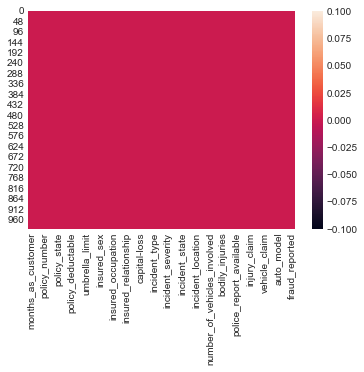

In [52]:
sns.heatmap(df.isnull())
plt.show()

Awesome, our dataset doesnot hav any missing value.

In [53]:
df.nunique().to_frame('unique value')

,unique value
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [54]:
df.drop(['incident_location', 'policy_number'],axis=1,inplace=True)

In [55]:
#getting object_datatype 
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
     object_datatype.append(x)
print('object_datatype = ',object_datatype)   

#getting numerical datatype
numerical_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
     numerical_datatype.append(x)
    
print('numerical datatype =', numerical_datatype)    

object_datatype =  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
numerical datatype = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


We are dropping 'incident_location'and 'policy_number' because these columns has 1000 unique value same as the number of rows.

In [56]:
df[object_datatype].nunique().to_frame('unique value')

,unique value
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


In [57]:
df[numerical_datatype].nunique().to_frame('unique value')

,unique value
months_as_customer,391
age,46
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
capital-gains,338
capital-loss,354
incident_hour_of_the_day,24
number_of_vehicles_involved,4


## Data Pre Processing

In [58]:
# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

# separating the Date column into seperate day - month -  year columns using pandas Datetime method
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

We have seprated the 'policy_bind_date' and 'incident date' into day,month,year format.

In [59]:
df.drop(['policy_bind_date','incident_date'],axis=1, inplace=True)

We have dropped the original columns since we have seprated them into day,month,year format.

In [60]:
df.shape

(1000, 41)

In [61]:
df.nunique().to_frame('unique_value')

,unique_value
months_as_customer,391
age,46
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2
insured_education_level,7


In [62]:
# replacing the "?" filled rows with a meaningful name of "questionable"
df['collision_type'] = df['collision_type'].replace('?', 'questionable')
df['property_damage'] = df['property_damage'].replace('?', 'questionable')
df['police_report_available'] = df['police_report_available'].replace('?', 'questionable')

In [63]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [64]:
# cheking for any missing data and if yes then it's percentage
for col in df:
    percentage = np.round((df[col].isnull().sum()/1000)*100, 2)
    print(col, ":".format(), percentage, '%')

months_as_customer : 0.0 %
age : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_hour_of_the_day : 0.0 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
policy_bind_Day : 0.0 %
policy_bind_Month : 0.0 %
policy_bind_Year : 0.0 %
incident_Day : 0.0 %
incident_Month : 0.0 %
incident_Year : 0.0 %


In [65]:
df.nunique().to_frame('unique_value')

,unique_value
months_as_customer,391
age,46
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2
insured_education_level,7


In [66]:
df.drop('incident_Year',axis=1,inplace=True)

In [67]:
#getting object datatype
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatype.append(x)
print('object_datatype = ', object_datatype) 

#numerical datatype
numerical_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float64':
        numerical_datatype.append(x)
print('numerical datatype =',numerical_datatype)

object_datatype =  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
numerical datatype = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month']


## Visualization

Single digit category column name: fraud_reported


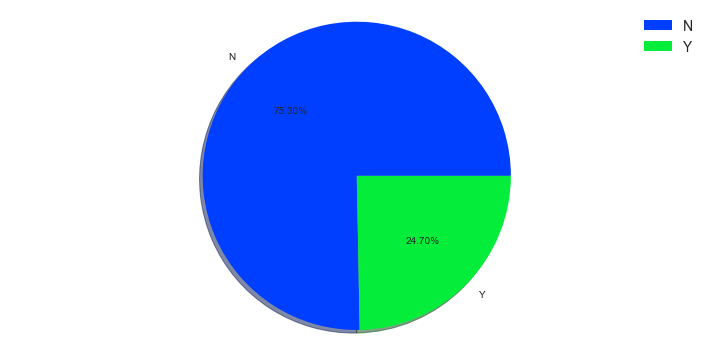

Single digit category column name: insured_sex


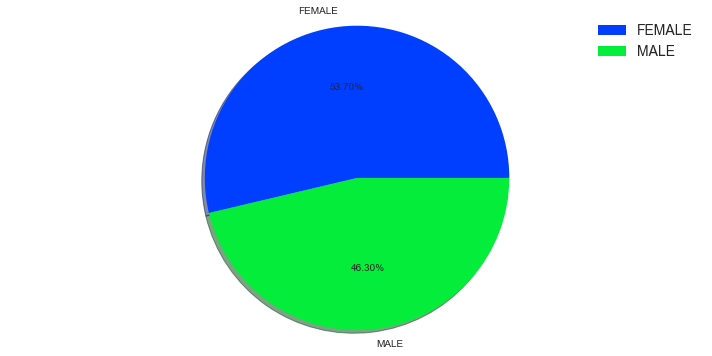

Single digit category column name: policy_state


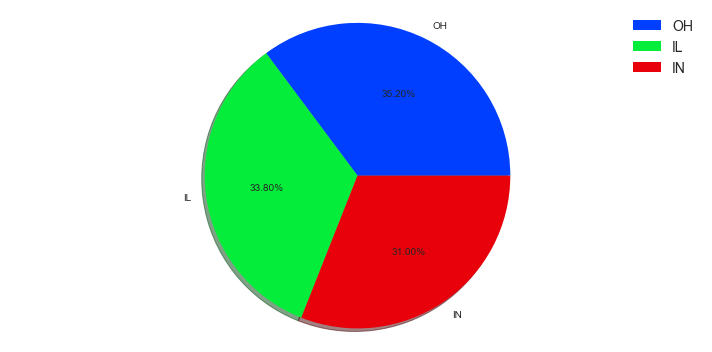

Single digit category column name: policy_csl


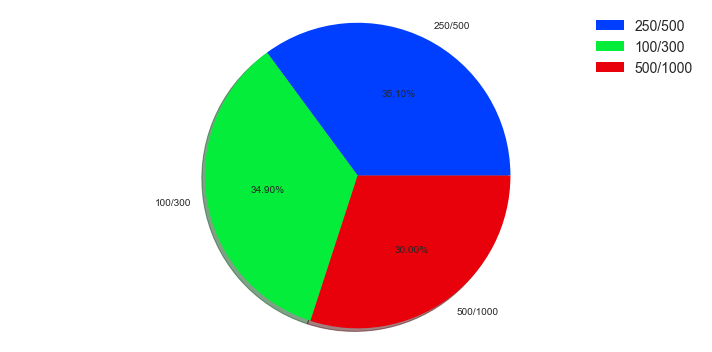

Single digit category column name: policy_deductable


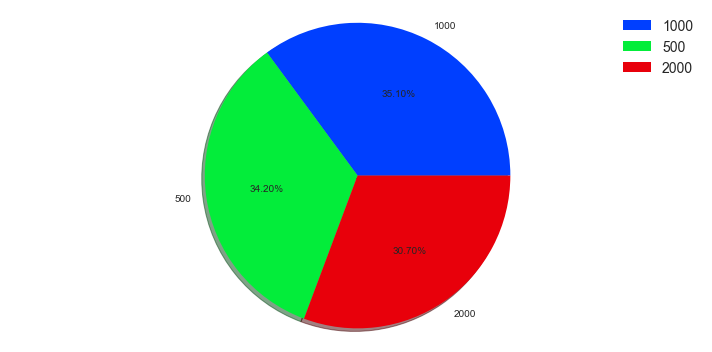

Single digit category column name: bodily_injuries


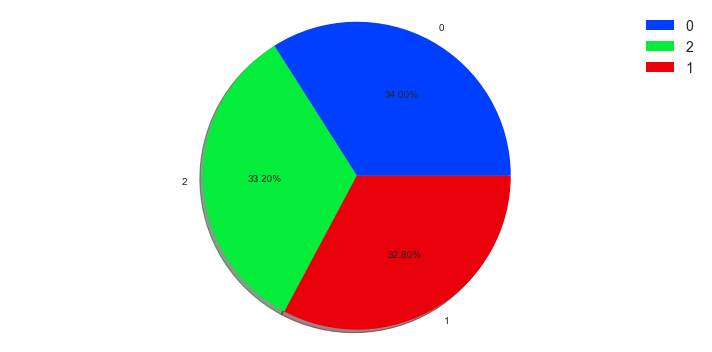

Single digit category column name: police_report_available


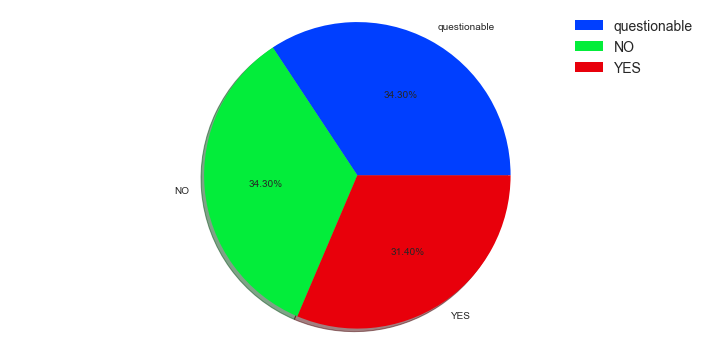

Single digit category column name: property_damage


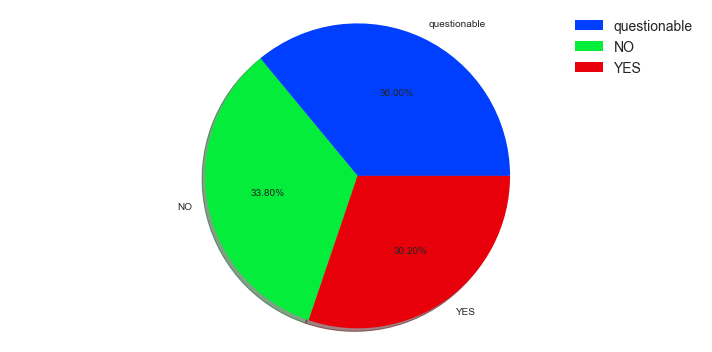

Single digit category column name: incident_type


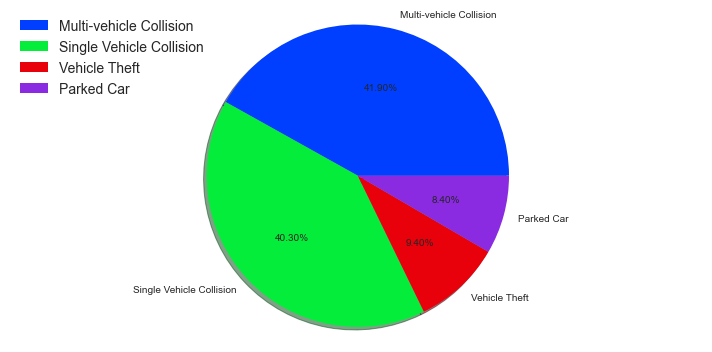

Single digit category column name: collision_type


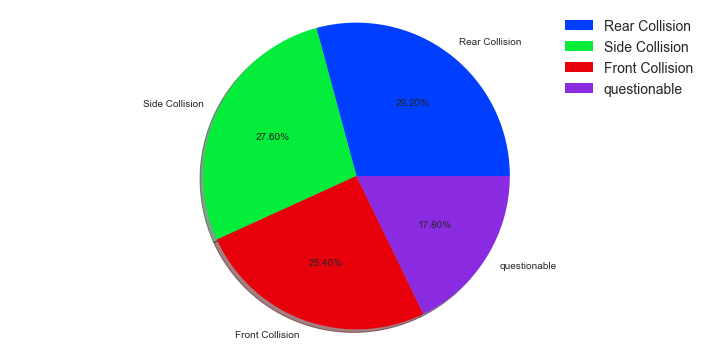

Single digit category column name: incident_severity


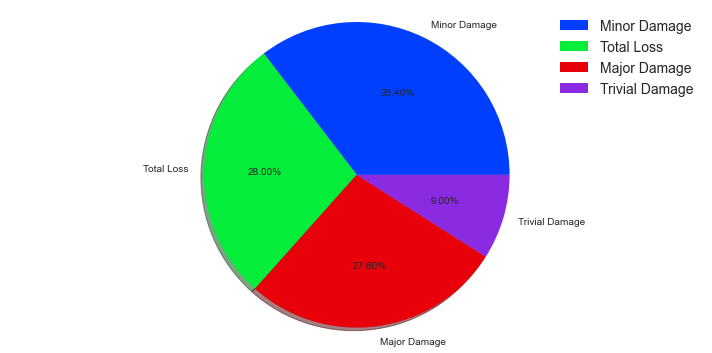

Single digit category column name: number_of_vehicles_involved


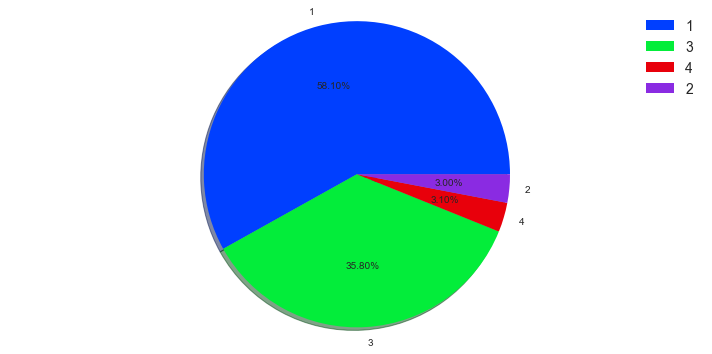

Single digit category column name: witnesses


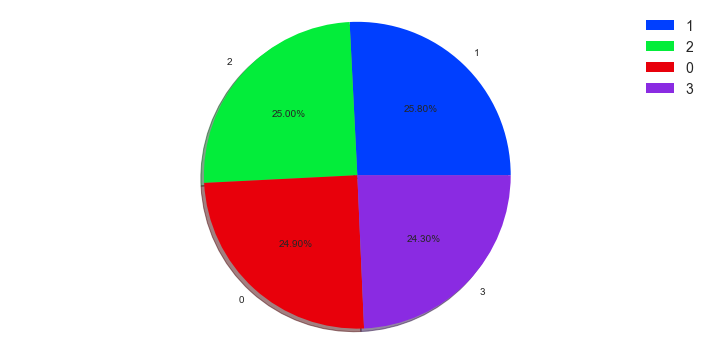

Single digit category column name: authorities_contacted


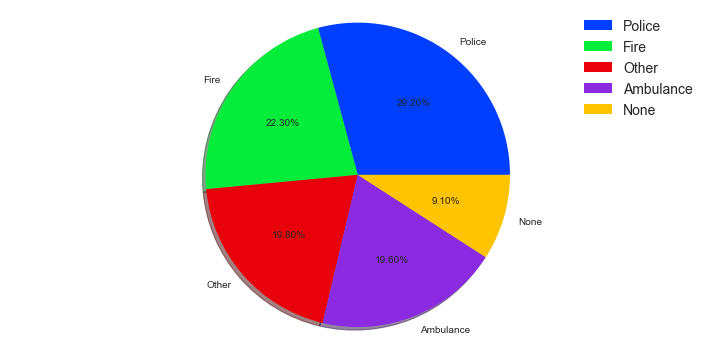

Single digit category column name: insured_relationship


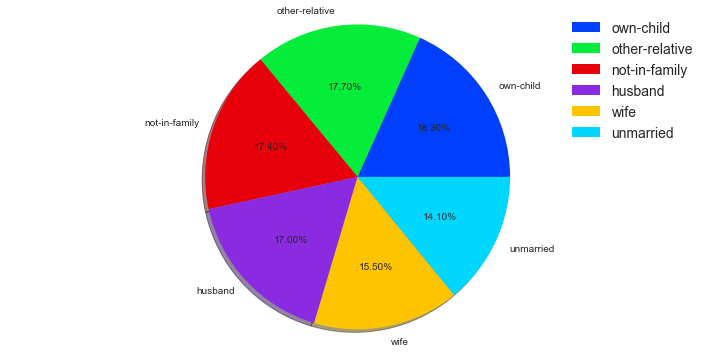

Single digit category column name: insured_education_level


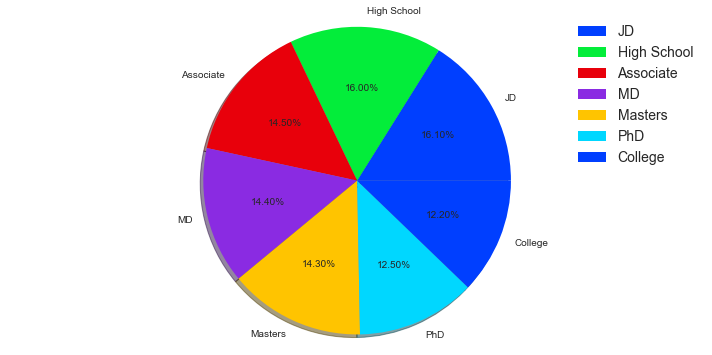

Single digit category column name: incident_state


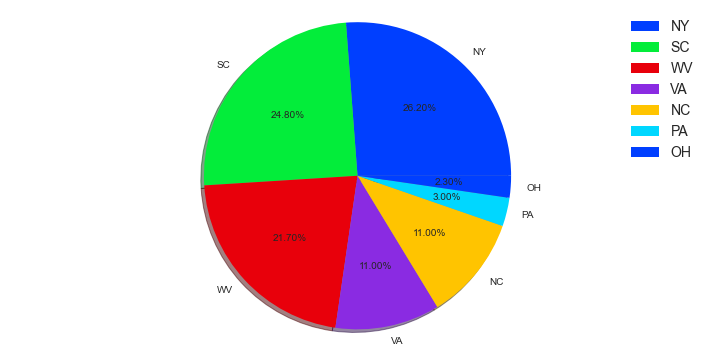

Single digit category column name: incident_city


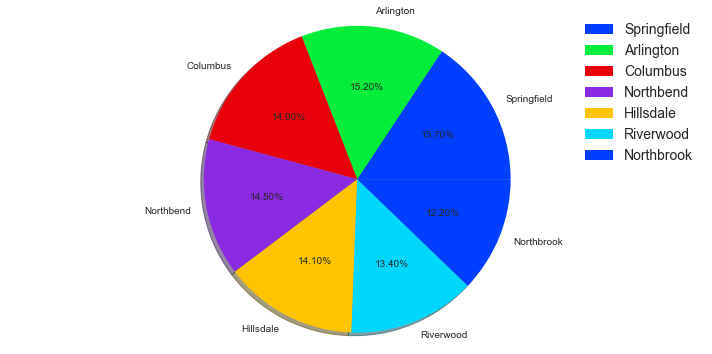

In [68]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%') 
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col1= ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']
for i in df[col1]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

we have used the pie chart to plot the catagorical data distribution

My obserbation for each of columns is:- 1.from the above pie chart we can see that less data is covered by yes fraud_reported and more portion of data are covered by y fraud reports. 2.we can see here the ratio of male and female in our dataset both are equally distributed although female are more a bit but negligible in considering. 3.from the above graph we can say that policy_state are more for OH other than IL, and IN. 4.from the above plot policy_csl 250/500 cover a bit more portion other than two other type of Policy_csl. 5.pie chart gave the policy deductable information such that 1000 is amount which covered more portion in this . 6.from the above the we have considered no badly injuries as 0 which is covering large data of our dataset. 7.from the above we can say the police report avaiblelity is no and questionable are taking same amount in our dataset. 8.if we look at the pie chart or property damage we can see that more portion is covored by quistionable and then No and finally yes as 30.2% of data. 9.from the pie chart of incident type we have multicollision type and single collision are covered most of data of dataset.

1. from the above pie chart of collision type we can see that Rear collision is covereing largest portion of our dataset. 11.from the above graph of incident severity we can look that total loss is greater in all. 12.from the above pie chart of vechicle involved we can see that more than 58% are single vehicle while collision happen. 13.witness section are distributed equally more and less. 14 from the pie chart of authorities contracted police has major portion for the authority.
2. if we look at relation ship who has viction then its distributed almost equally. 16.eduaction of each of also distributed 12% to to 18% high school and master are covering more portion . 17.look at the state then SC,Ny,Nc are covering most of the portion of dataset. 18 from the above pie chart of city we can say more & less city distribution of our dataset are equal.

Double digit category column name: umbrella_limit


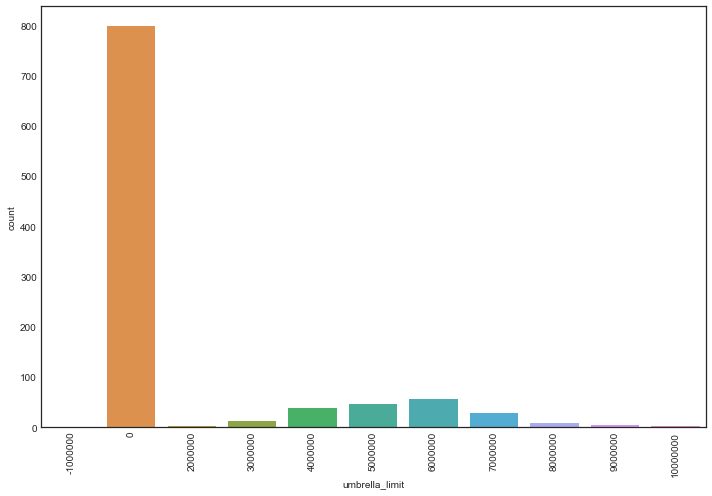

Double digit category column name: insured_occupation


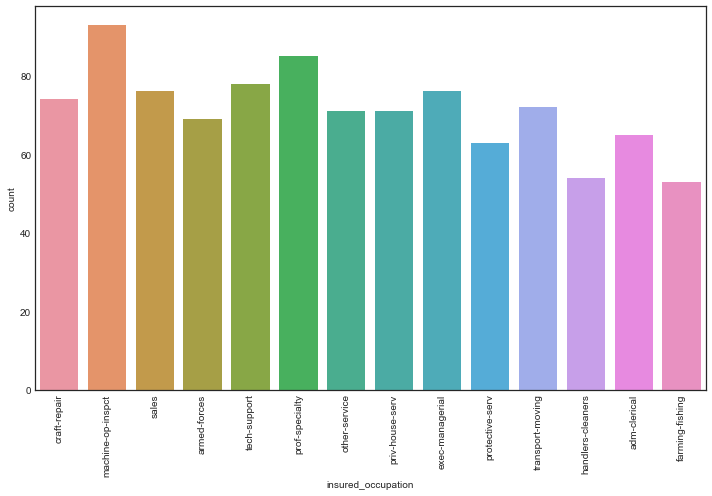

Double digit category column name: auto_make


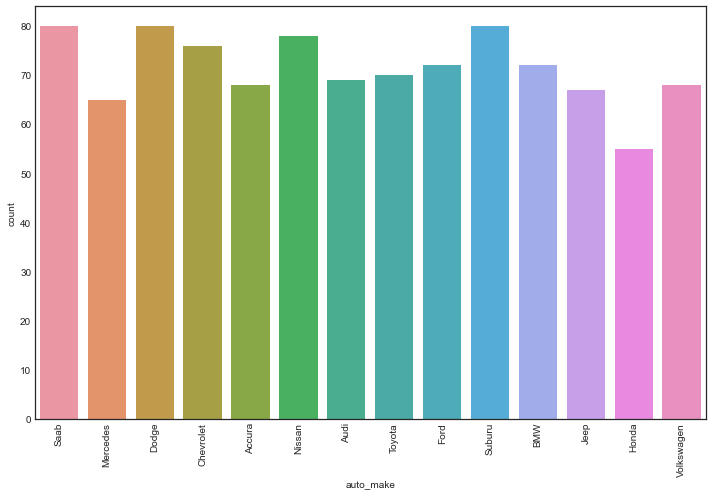

Double digit category column name: insured_hobbies


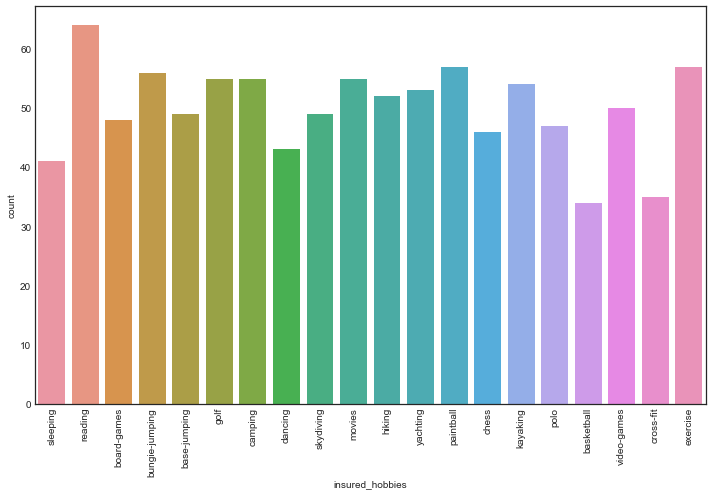

Double digit category column name: auto_model


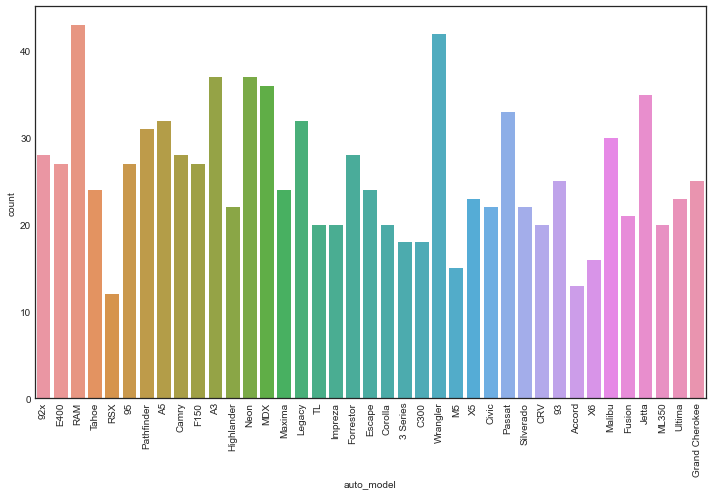

In [69]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[col2]:
    print(f"Double digit category column name:", j)
    generate_countplot(df[j])

insured_sex vs fraud_reported column ->


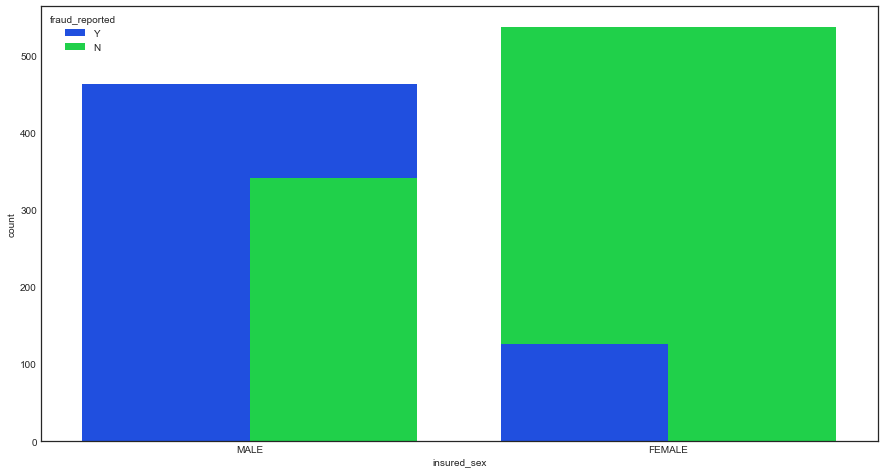

policy_state vs fraud_reported column ->


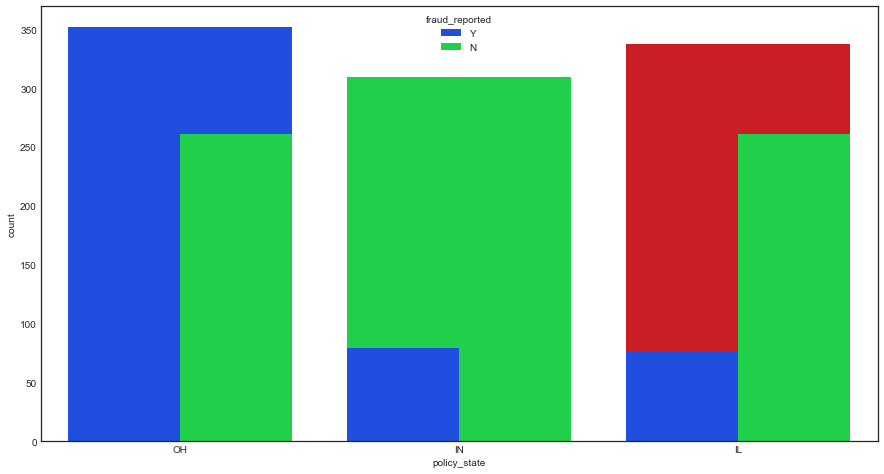

policy_csl vs fraud_reported column ->


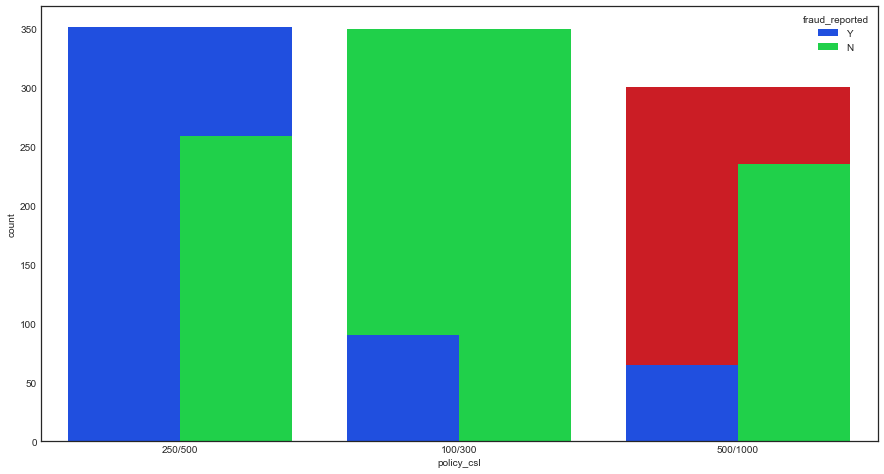

policy_deductable vs fraud_reported column ->


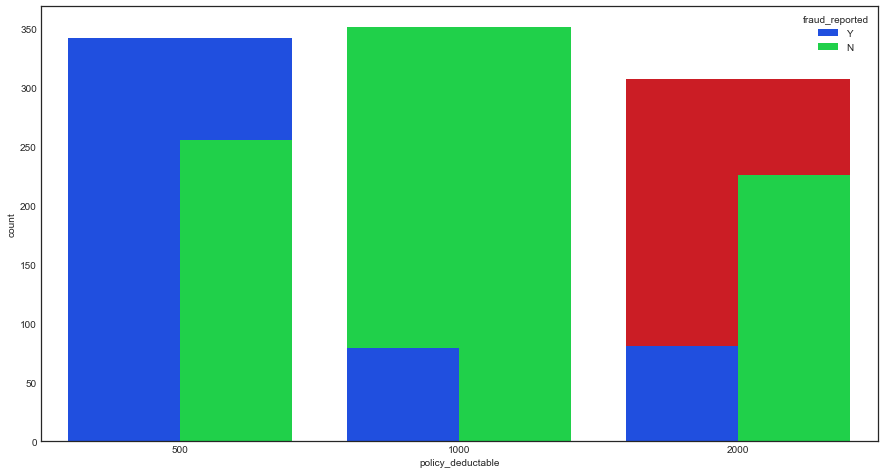

bodily_injuries vs fraud_reported column ->


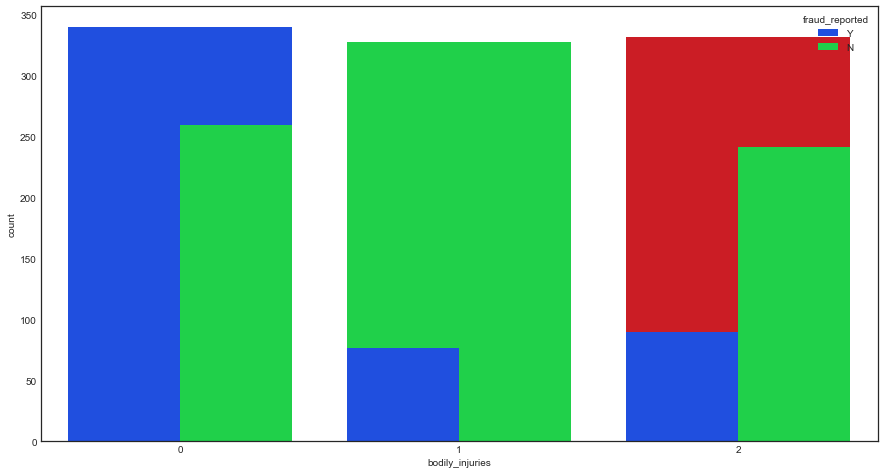

police_report_available vs fraud_reported column ->


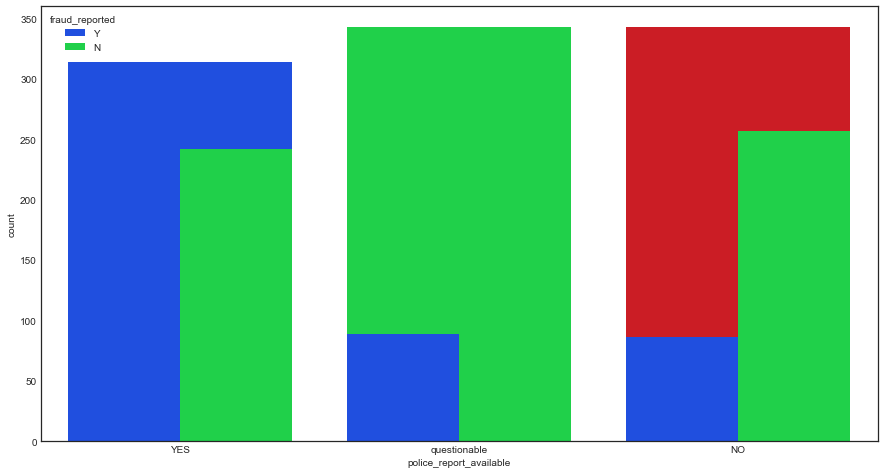

property_damage vs fraud_reported column ->


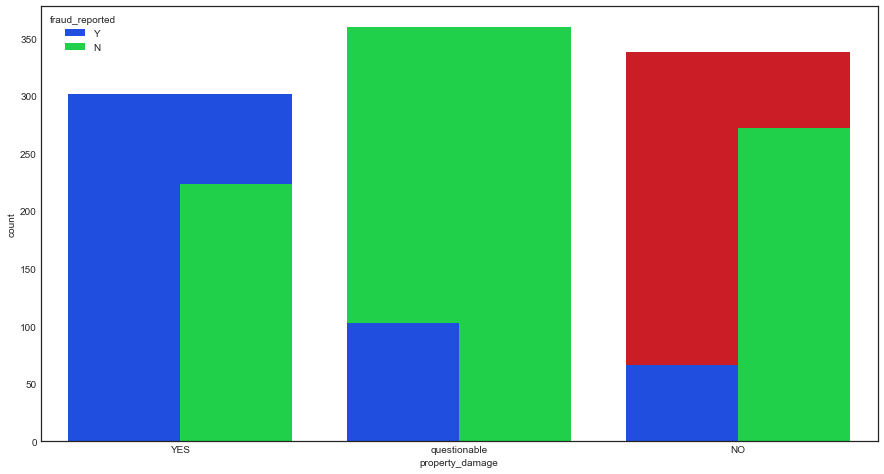

incident_type vs fraud_reported column ->


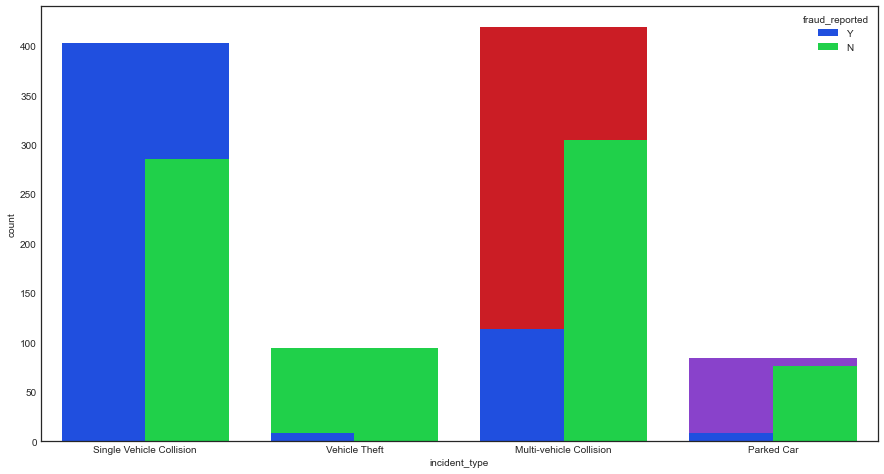

collision_type vs fraud_reported column ->


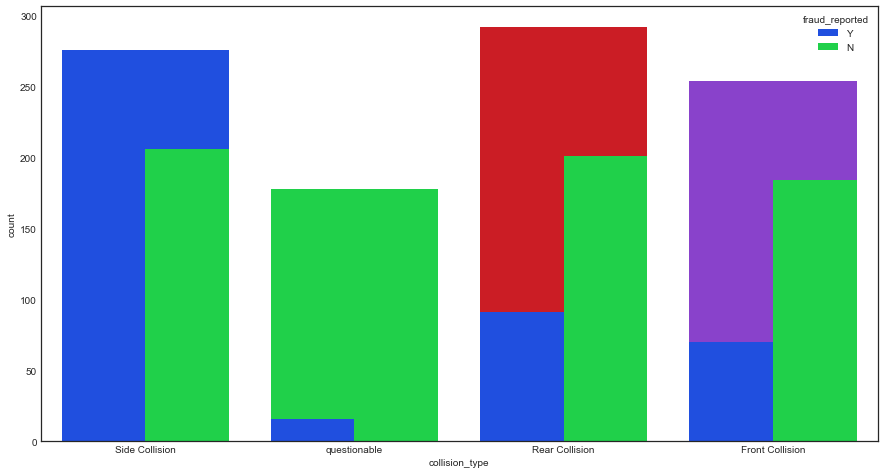

incident_severity vs fraud_reported column ->


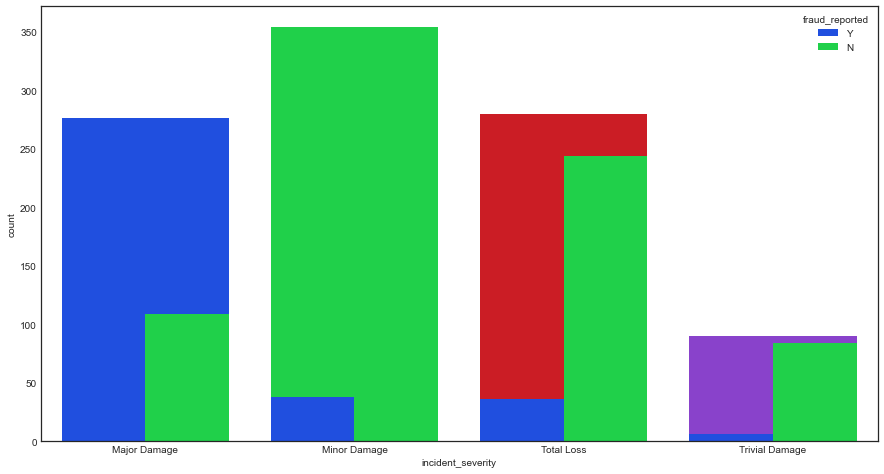

number_of_vehicles_involved vs fraud_reported column ->


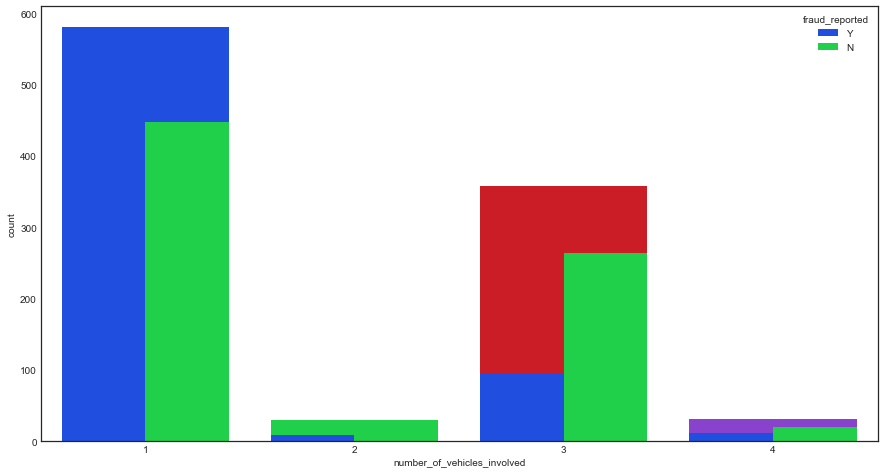

witnesses vs fraud_reported column ->


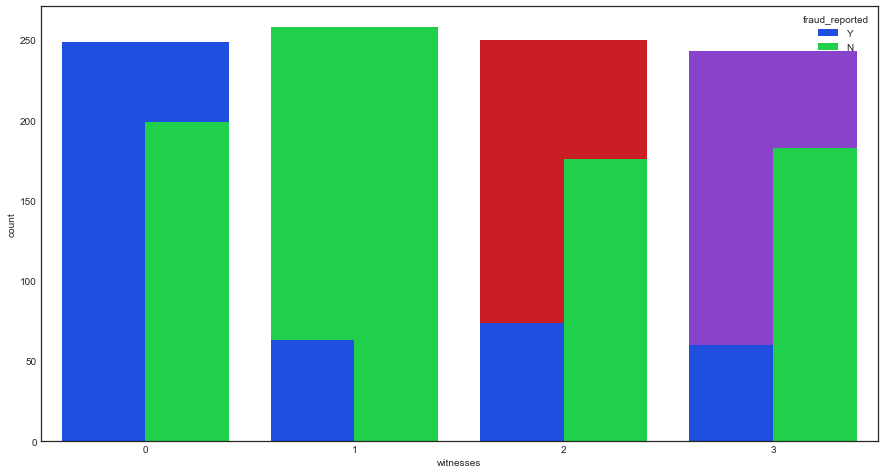

authorities_contacted vs fraud_reported column ->


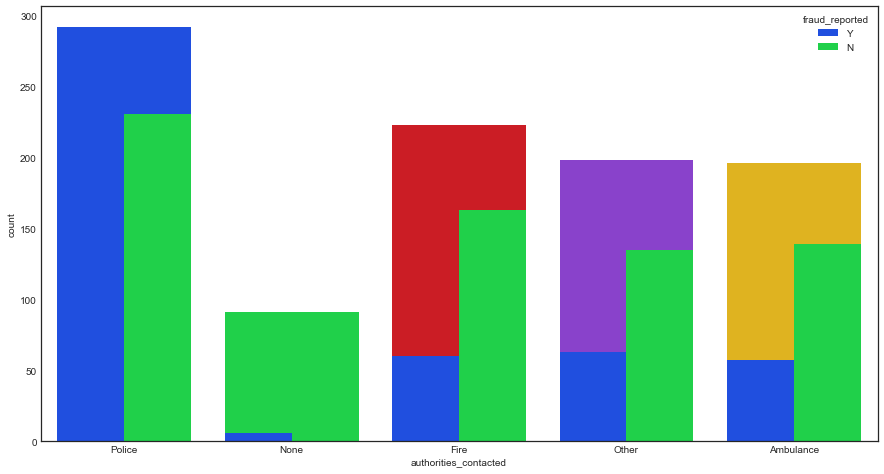

insured_relationship vs fraud_reported column ->


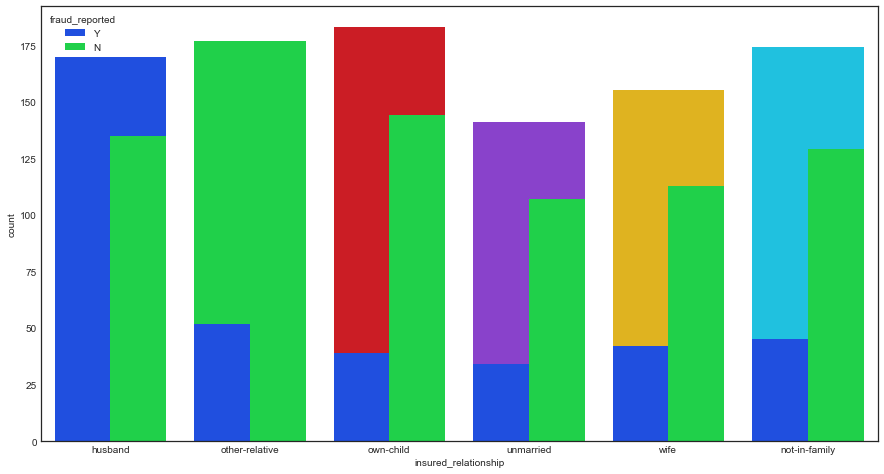

insured_education_level vs fraud_reported column ->


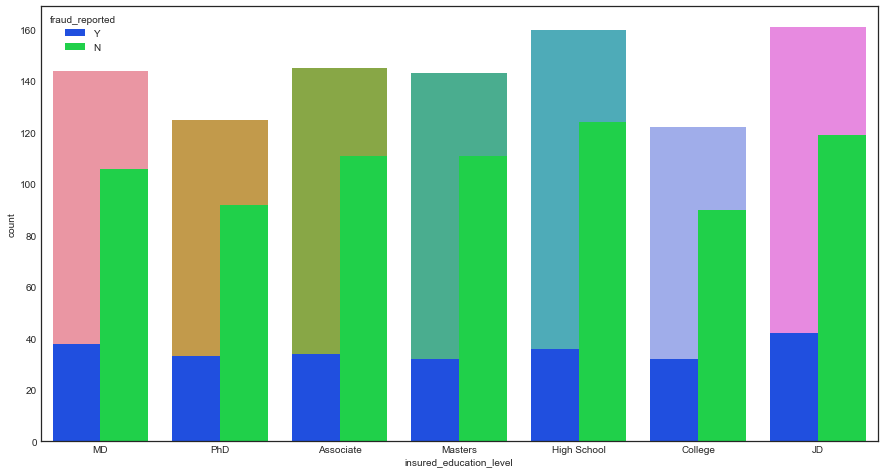

incident_state vs fraud_reported column ->


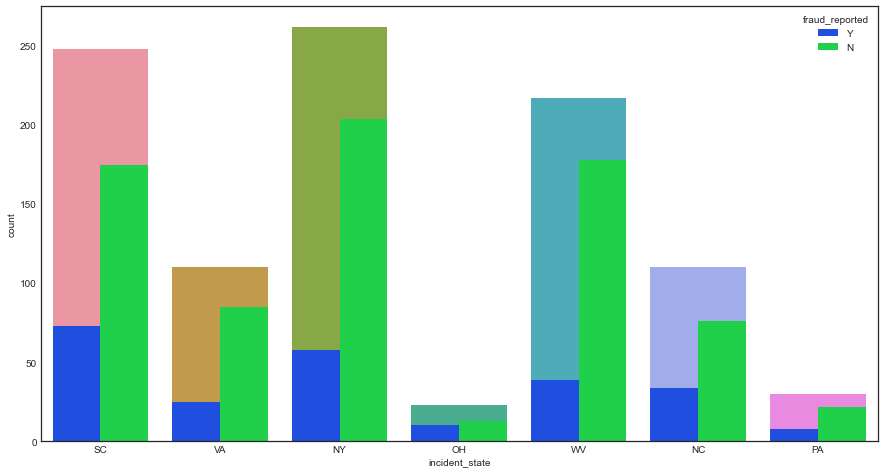

incident_city vs fraud_reported column ->


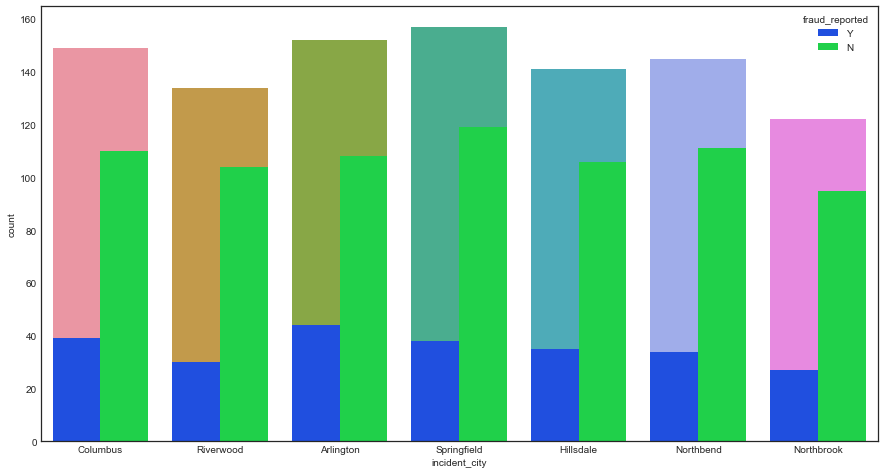

umbrella_limit vs fraud_reported column ->


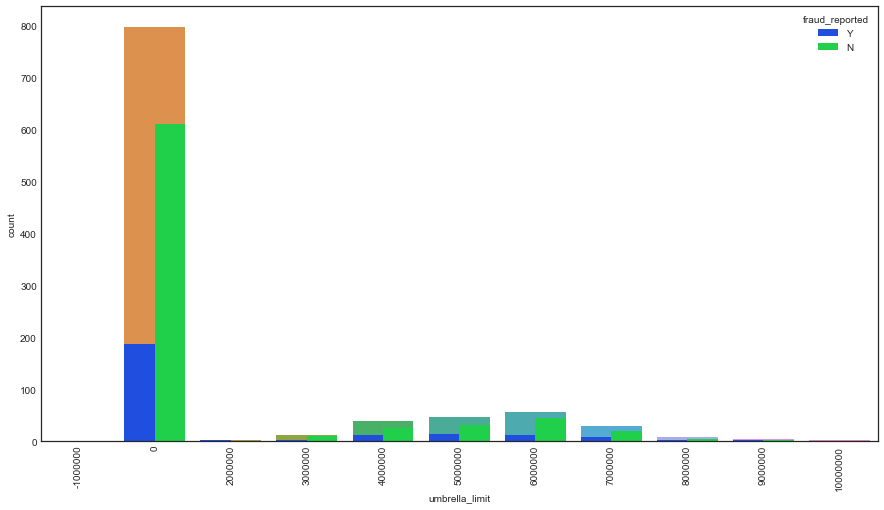

insured_occupation vs fraud_reported column ->


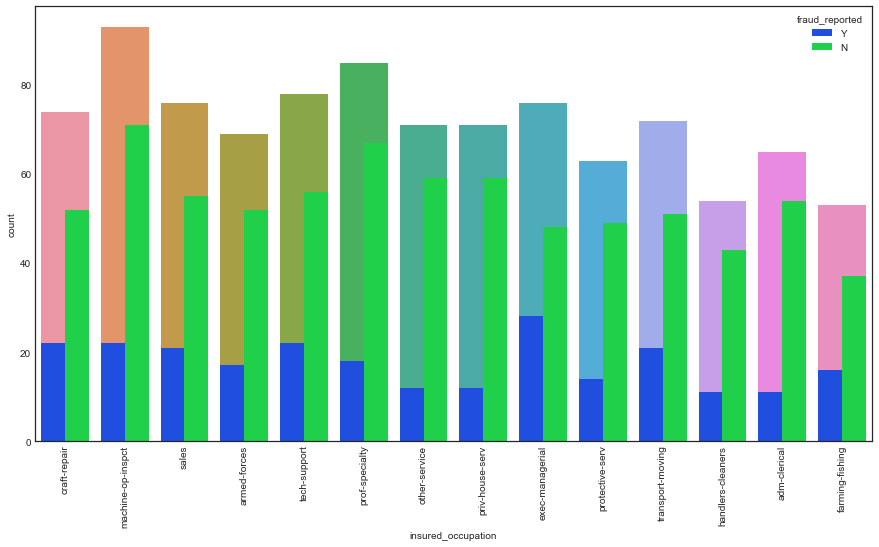

auto_make vs fraud_reported column ->


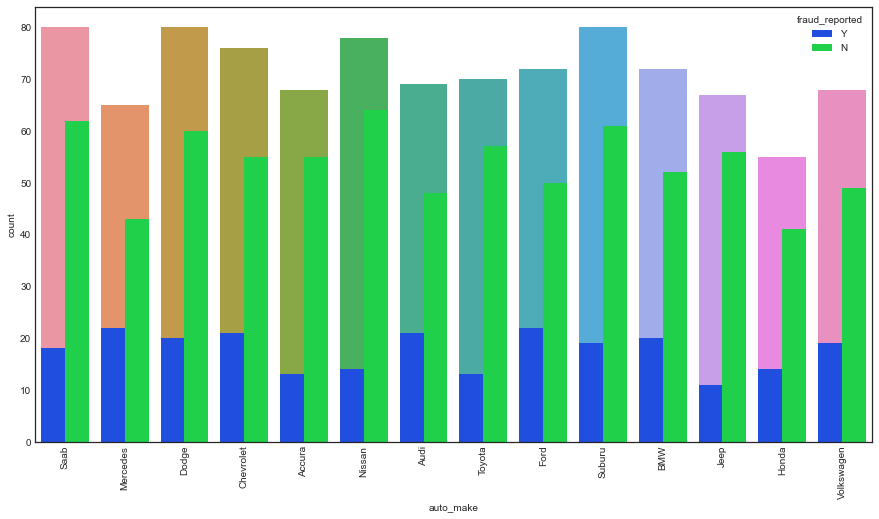

insured_hobbies vs fraud_reported column ->


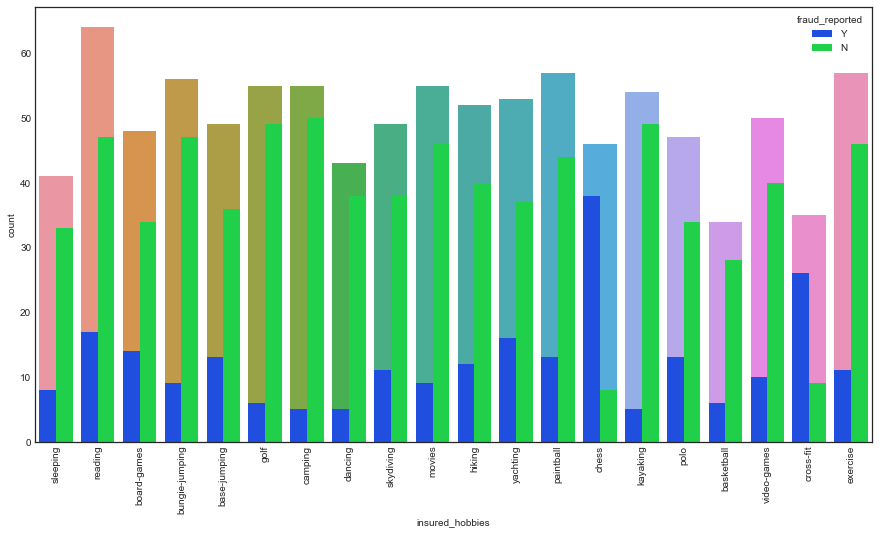

auto_model vs fraud_reported column ->


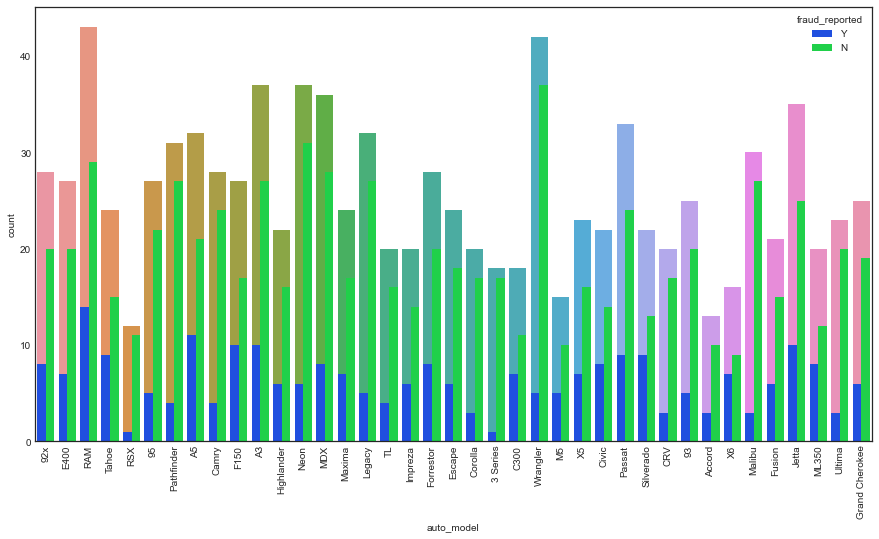

In [70]:
plt.style.use('seaborn-bright')

col1.remove("fraud_reported")

for k in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{k} vs fraud_reported column ->")
    sns.countplot(df[k])
    sns.countplot(df[k], hue=df['fraud_reported'])
    plt.show()
    
for l in df[col2]:
    plt.figure(figsize=(15,8))
    print(f"{l} vs fraud_reported column ->")
    sns.countplot(df[l])
    sns.countplot(df[l], hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

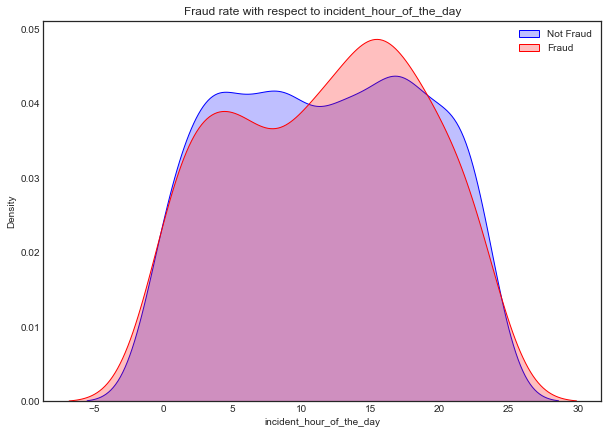

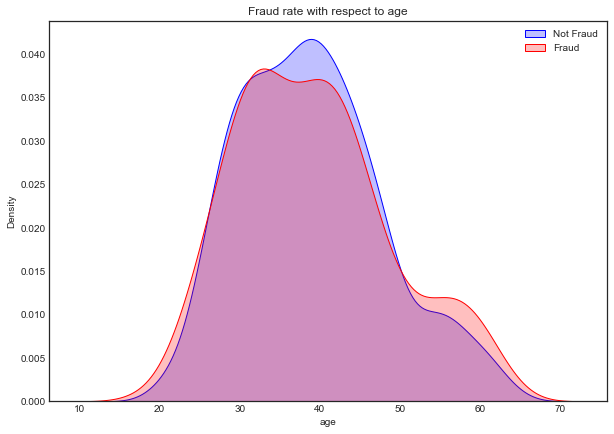

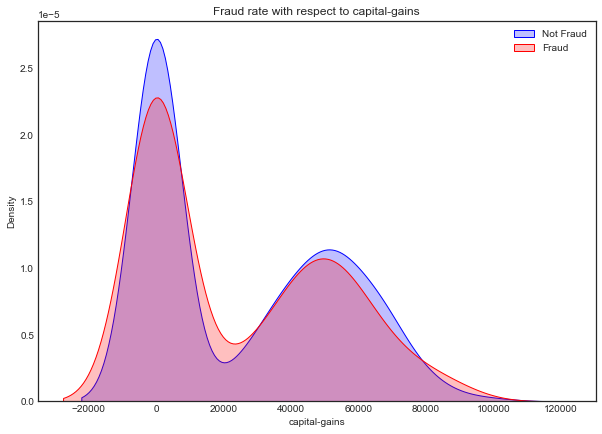

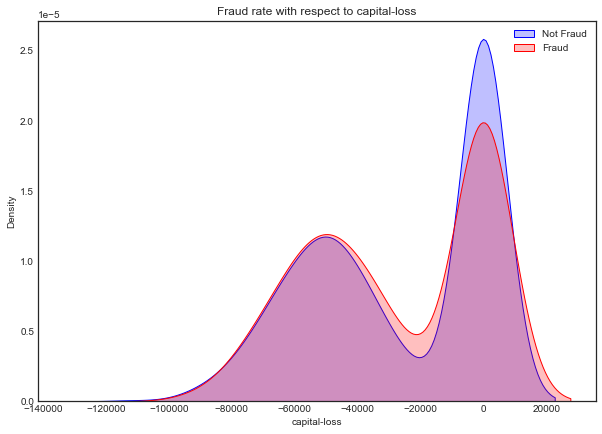

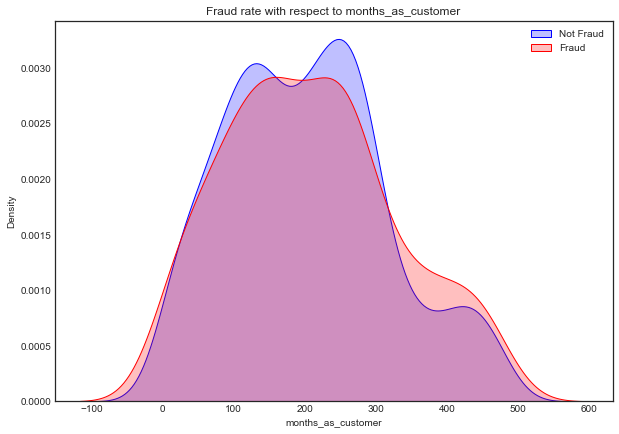

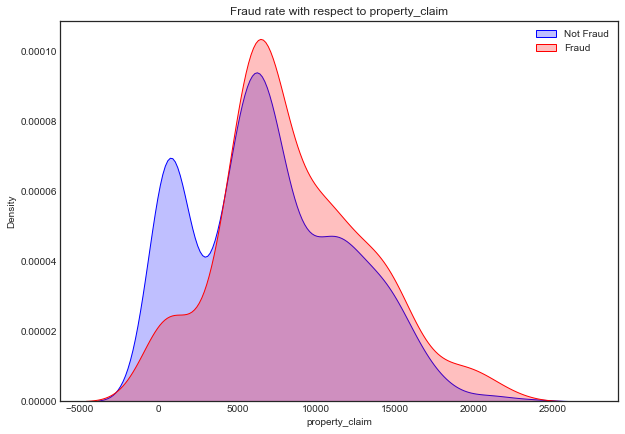

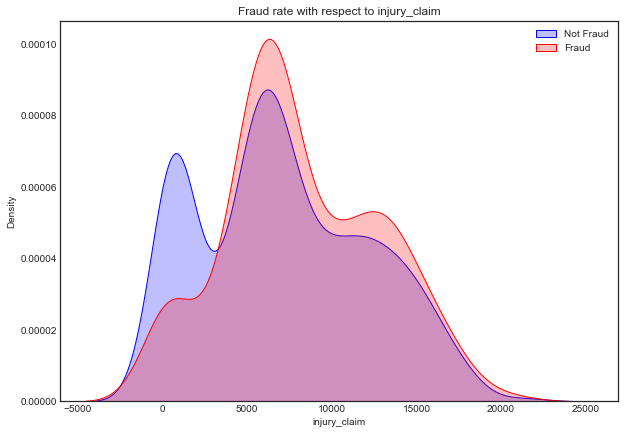

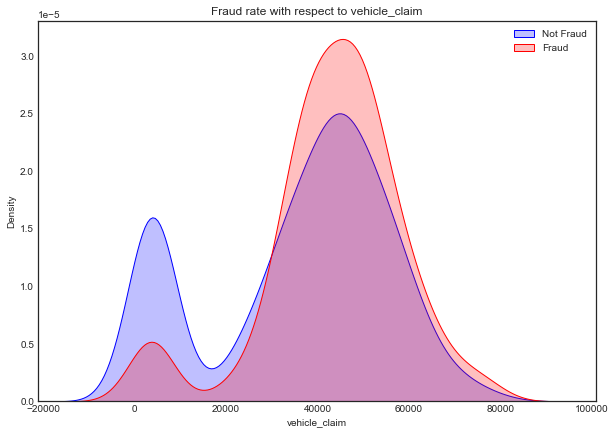

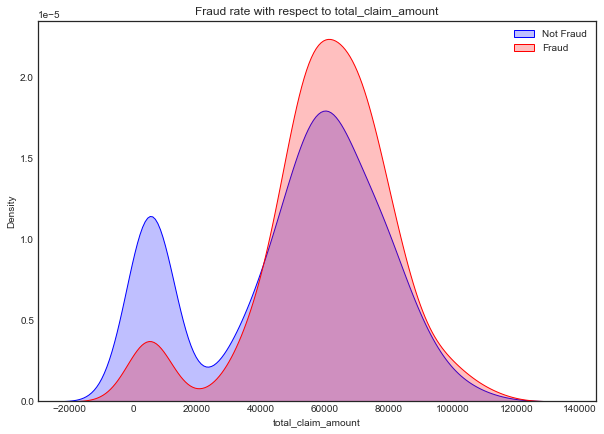

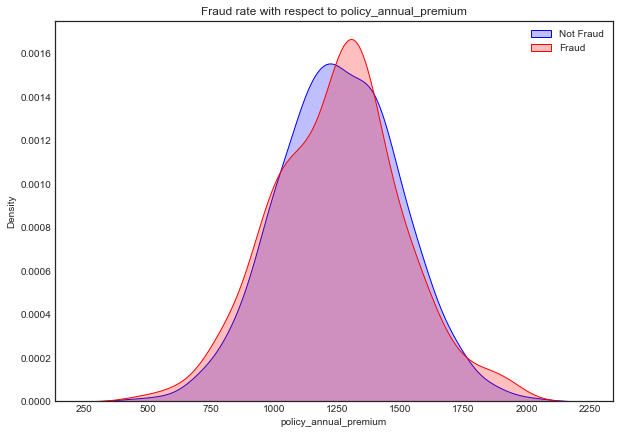

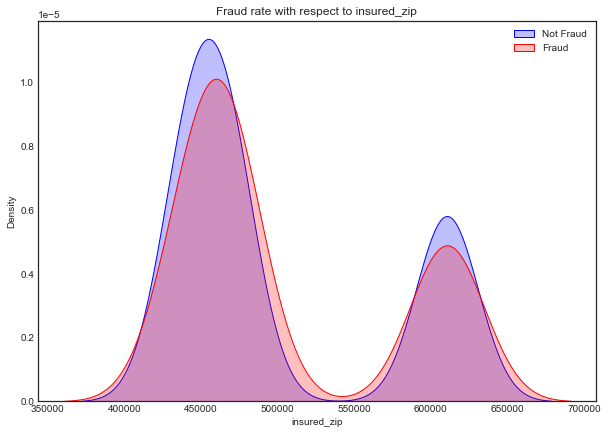

In [71]:
col3 = ['incident_hour_of_the_day', 'age', 'capital-gains', 'capital-loss', 'months_as_customer', 'property_claim',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'policy_annual_premium', 'insured_zip']

for z in df[col3]:
    fig = plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'N'),z], color='b', shade=True, label='Not Fraud') 
    ax=sns.kdeplot(df.loc[(df['fraud_reported'] == 'Y'),z], color='r', shade=True, label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()

We have drawn kde plot for numerical datatype data.

In [72]:
object_datatype.remove('fraud_reported')

We have removed our label/target incoder to use LabelEncoder and for rest of feature we will use Ordinal Encoder.

In [73]:
obj_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        obj_datatype.append(x)
print(obj_datatype)   

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


## Encoding

In [74]:
#labelEncoder
le=LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [75]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, obj_datatype)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,52080,10.0,1.0,2004,1.0,17,10,2014,25,1
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,3510,8.0,12.0,2007,1.0,27,6,2006,21,1
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,23100,4.0,30.0,2007,0.0,9,6,2000,22,2
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,50720,3.0,34.0,2014,1.0,25,5,1990,1,10
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,4550,0.0,31.0,2009,0.0,6,6,2014,17,2


## Checking Outliers

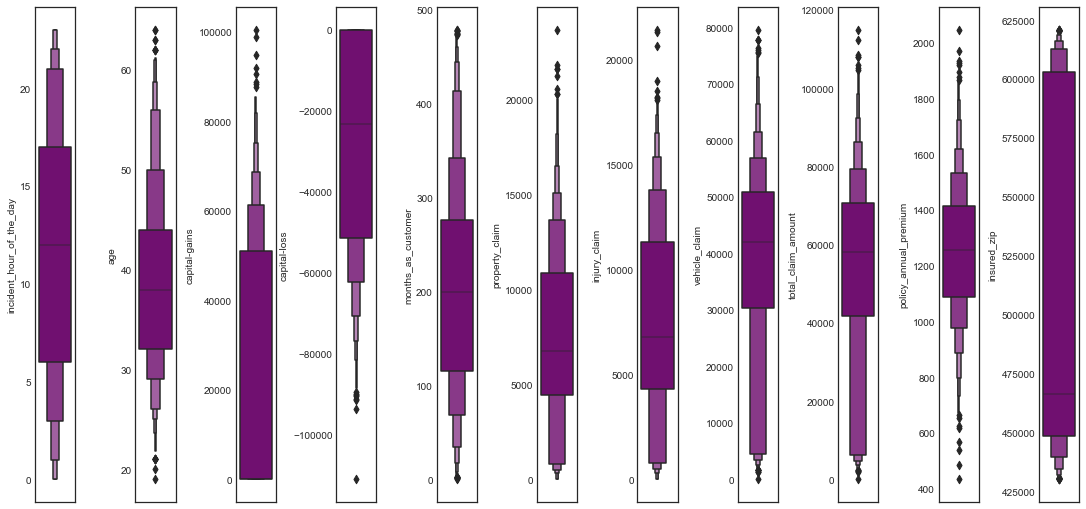

In [76]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

From the above boxenplot we can see that some columns must have outliers we just deal with it now.

In [77]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

2.0

Great, After removing the outlier our data loss is only 2%.

In [78]:
df=df1.copy()

## Checking skewness

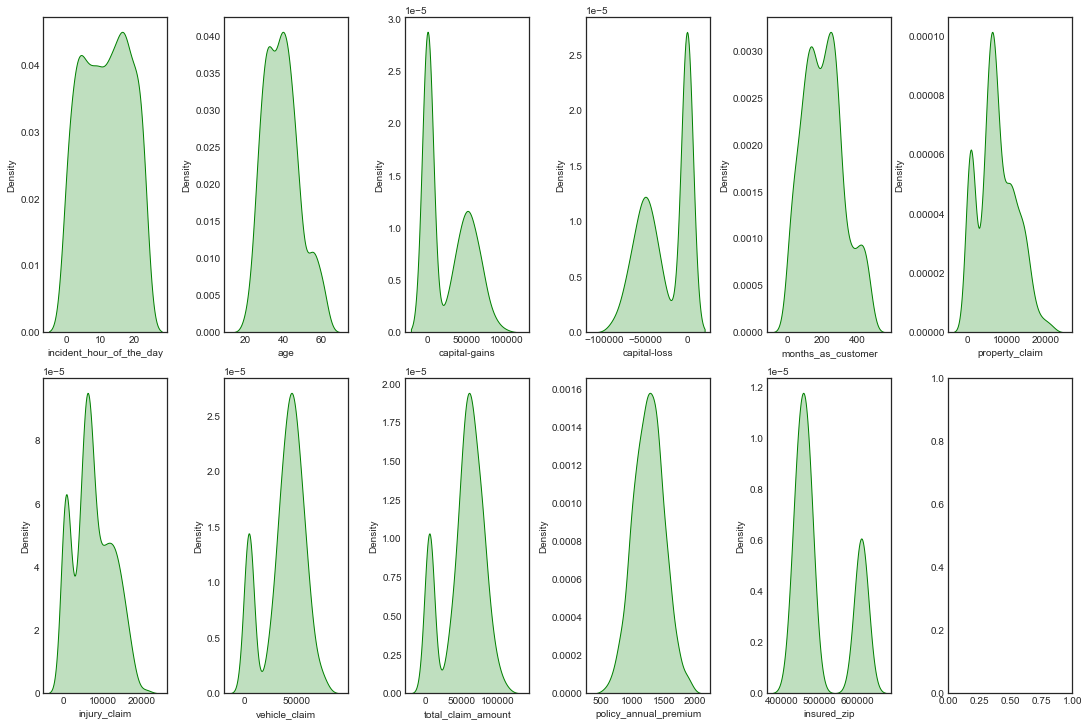

In [79]:
fig, ax=plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col, value in df[col3].items():
    sns.distplot(value, ax=ax[index],hist=False, color='g', kde_kws={'shade':True})
    index += 1
plt.tight_layout(pad=.4,w_pad=.4,h_pad=1.0)
plt.show()

In [80]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                 0.128949
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage               -0.042133
bodily_injuries                0.003757


From the above skew method we can see that we have only few columns is out of acceptable range +-.5 we need to deal with them.

## Using Log transformation method to fix the skewness

In [81]:
 for col in numerical_datatype:
        if df.skew().loc[col]>.55:
            df[col]=np.log1p(df[col])

## Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

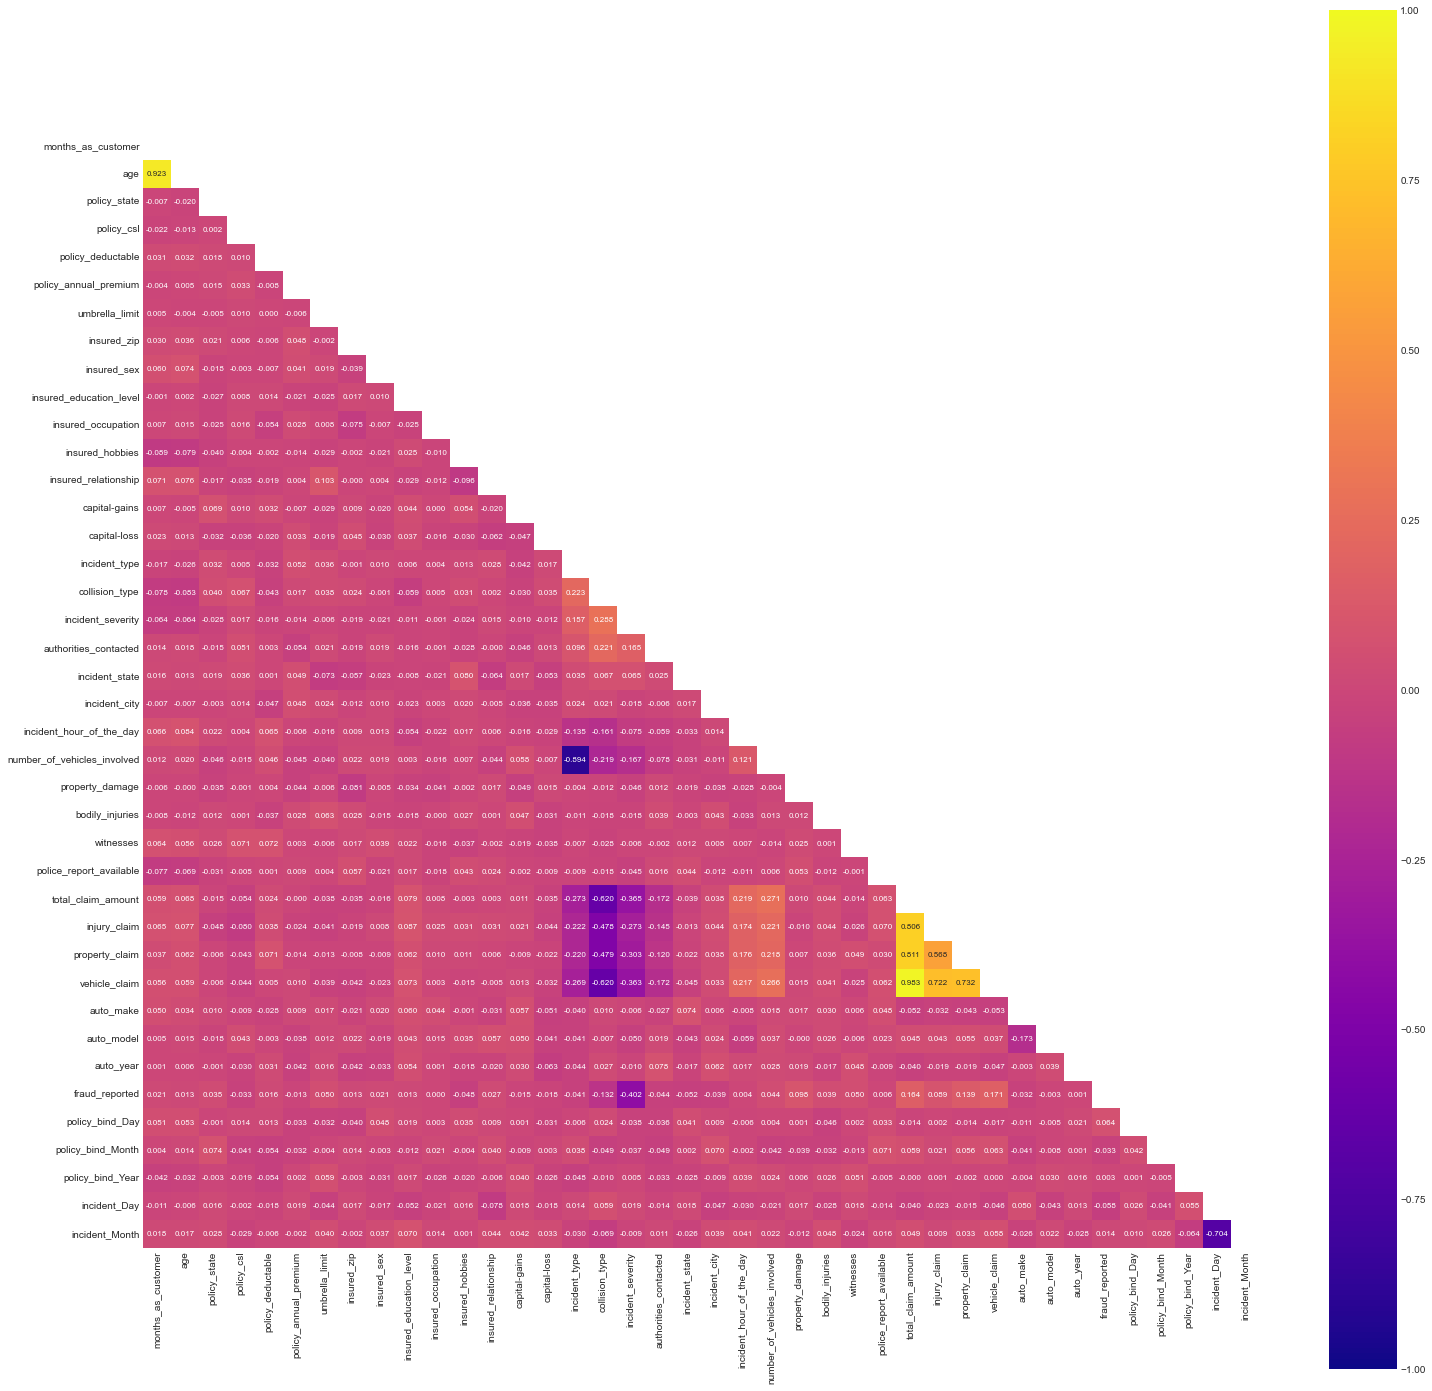

In [82]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the above plot we can have proper information of multicolliarnity.

## Correlation Bar Plot comparing features with our label¶

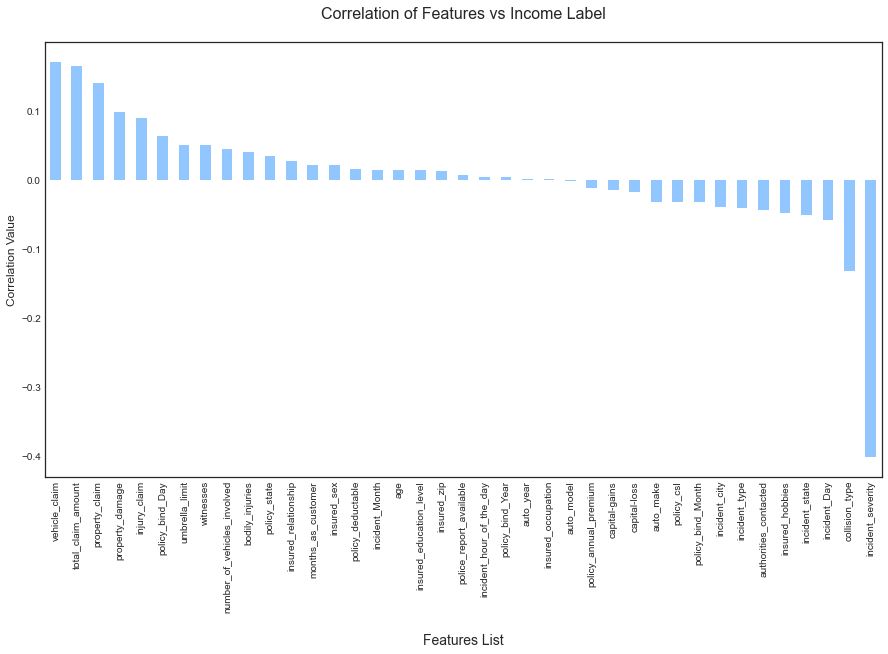

In [83]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture of positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.

In [84]:
df.dropna(inplace=True)

Making sure there is no any null value present in our dataset.

## Splitting the whole dataset into two variables namely X and Y.

In [85]:
X=df.drop('fraud_reported',axis=1)
Y=df['fraud_reported']

In [86]:
Y.value_counts()

0.0    739
1.0    240
Name: fraud_reported, dtype: int64

## Resolving the Class imbalance issue in our label column

In [87]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [88]:
Y.value_counts()

1.0    739
0.0    739
Name: fraud_reported, dtype: int64

Good, now it's been resolved

## Feature Scaling

In [89]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,1.097221,1.025226,1.234143,0.084609,-0.259264,0.624666,-0.524564,-0.500434,1.117054,0.554735,...,1.163611,0.689083,0.955105,-1.739998,-0.177683,0.179055,1.163363,1.800025,1.286640,-0.979439
1,0.203923,0.357062,-0.048041,0.084609,1.454224,-0.266093,2.145080,-0.465837,1.117054,0.554735,...,-1.535827,-2.081412,0.425841,-0.697966,0.350364,1.369532,-0.099778,0.660224,0.873843,-0.979439
2,-0.635777,-1.090626,1.234143,-1.249590,1.454224,0.651131,2.145080,-1.126790,-1.021839,1.648346,...,-0.858762,-0.963973,-0.632686,1.007177,0.350364,-0.773327,-0.099778,-0.194626,0.977042,-0.284245
3,0.454047,0.245702,-1.330225,0.084609,1.454224,0.662176,2.176635,1.602037,-1.021839,1.648346,...,-0.309612,0.611507,-0.897317,1.386098,1.582474,1.131437,-0.415563,-1.619376,-1.190144,1.943451
4,0.203923,0.579784,-1.330225,1.418807,-0.259264,1.376559,2.176635,1.635629,1.117054,-1.632485,...,-1.564497,-2.022089,-1.691212,1.101907,0.702395,-1.130470,-0.099778,1.800025,0.461046,-0.284245


We have used Standard scaler method to avoid the biasness for any particular column.

## Finding best Random state for our best Machine learning classification model.

In [90]:
maxAcc=0
maxRs=0
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    classifier=lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    accuracy=accuracy_score(pred,Y_test)
    if accuracy>maxAcc:
        maxAcc=accuracy
        maxRs=i
        
print('best accuracy score is',maxAcc, 'best random state is',maxRs)     

best accuracy score is 0.8297297297297297 best random state is 49


## Feature importance bar graph

In [91]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
incident_severity,0.195
collision_type,0.043
insured_hobbies,0.041
incident_state,0.035
insured_zip,0.034
vehicle_claim,0.033
policy_csl,0.033
total_claim_amount,0.033
insured_sex,0.031


## Machine Learning Model for classification with Evaulution metrics

In [92]:
#classification model function
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=346)
    
    #training the model
    model.fit(X_train,Y_train)
    
    #predicting the Y_test
    pred=model.predict(X_test)
    
    
    #classification_report 
    class_report=classification_report(Y_test,pred)
    print('classification Report =',class_report)
    
    #accuracy score
    accuracy=accuracy_score(Y_test,pred)*100
    print('accuracy score =',accuracy)
    
    
    #cv_score
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cross_val_score =',cv_score)
    
    #Result
    Result=accuracy-cv_score
    print('accuracy-cv score =',Result)

In [93]:
#LogisticRegression
model=LogisticRegression()
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       186
         1.0       0.79      0.84      0.81       184

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370

accuracy score = 80.8108108108108
cross_val_score = 75.91983508932663
accuracy-cv score = 4.890975721484182


In [94]:
#support vector classifier
model=SVC(kernel='rbf',C=1.0, gamma='auto',random_state=42)
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       186
         1.0       0.90      0.91      0.90       184

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370

accuracy score = 90.27027027027027
cross_val_score = 85.12482821804855
accuracy-cv score = 5.145442052221725


In [95]:
#DecisionTree classifier
model=DecisionTreeClassifier(random_state=42,max_depth=15)
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       186
         1.0       0.83      0.86      0.85       184

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

accuracy score = 84.5945945945946
cross_val_score = 84.30966559780119
accuracy-cv score = 0.2849289967934112


In [96]:
#RandomForestclassifier
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       186
         1.0       0.92      0.91      0.92       184

    accuracy                           0.92       370
   macro avg       0.92      0.92      0.92       370
weighted avg       0.92      0.92      0.92       370

accuracy score = 91.62162162162161
cross_val_score = 85.46472743930372
accuracy-cv score = 6.156894182317899


In [97]:
#kneighboreClassifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.97      0.21      0.35       186
         1.0       0.55      0.99      0.71       184

    accuracy                           0.60       370
   macro avg       0.76      0.60      0.53       370
weighted avg       0.77      0.60      0.53       370

accuracy score = 60.0
cross_val_score = 59.204535043518106
accuracy-cv score = 0.7954649564818936


In [98]:
#Extra Trees Classifier
model=ExtraTreesClassifier()
classify(model,X,Y)

classification Report =               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       186
         1.0       0.92      0.96      0.94       184

    accuracy                           0.94       370
   macro avg       0.94      0.94      0.94       370
weighted avg       0.94      0.94      0.94       370

accuracy score = 93.51351351351352
cross_val_score = 89.99335776454419
accuracy-cv score = 3.52015574896933


## Hyper parameter tuning on best classification model

In [99]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 213, 1000],
              'max_depth' : [30, 40, 50],
              'n_estimators' : [300, 500, 700]
             }

In [100]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [101]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 500, 700], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 213, 1000]})

In [103]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 213}

In [104]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=213)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.45945945945945


## Auc Roc Curve

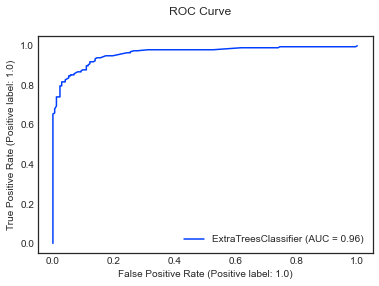

In [105]:
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

## Confusion Matrix

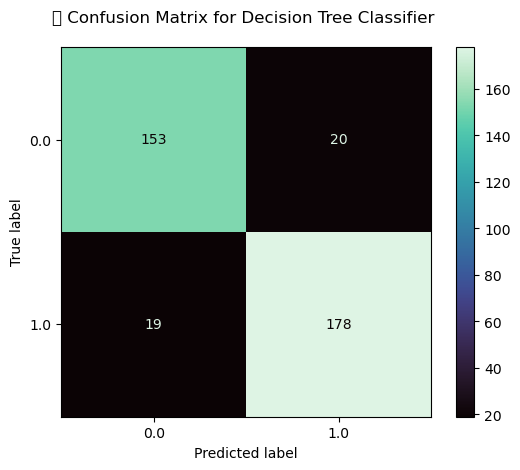

In [106]:
plt.style.use('default')

class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

## Saving the model

In [107]:
Filename='final_model_08'
joblib.dump(Final_Model,Filename)

['final_model_08']